In [5]:
!pip install git+https://github.com/Frankothe196/auto-sklearn.git@python3.10-added-compatibility

  Cloning https://github.com/Frankothe196/auto-sklearn.git (to revision python3.10-added-compatibility) to /tmp/pip-req-build-oj4x5hlr
  Running command git clone --filter=blob:none --quiet https://github.com/Frankothe196/auto-sklearn.git /tmp/pip-req-build-oj4x5hlr
  Running command git checkout -b python3.10-added-compatibility --track origin/python3.10-added-compatibility
  Switched to a new branch 'python3.10-added-compatibility'
  Branch 'python3.10-added-compatibility' set up to track remote branch 'python3.10-added-compatibility' from 'origin'.
  Resolved https://github.com/Frankothe196/auto-sklearn.git to commit 80a575760e99945fa31970b1479edeb759bc645a
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [6]:
import sklearn.model_selection
from sklearn.datasets import fetch_openml
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import numpy as np

X, y = fetch_openml(data_id=40691, as_frame=True, return_X_y=True)
y = np.array(y, dtype=int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
#!pip install auto-sklearn

When we ran AutoSklean previously which can be seen in my first attempt for this homework, on a wine quality dataset for 5 minutes, its performance with a default parameter Random Forest Classifier from scikit-learn and with Autosklearn is as follows:
•	Random Forest Accuracy: 0.67
•	Auto-sklearn Accuracy (initial run): 0.65

This is unusual since a tuned pipeline is supposed to perform as good as the default RF if not better. Below are the steps to analyse the issues.


# Data preprocessing

Initially, the quality of the data will be assessed. Given that the goal is to categorize wine quality using feature columns, the analysis will primarily concentrate on three key aspects:

1. Missing values
2. Skewness in data distribution
3. Imbalance in data

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


From above result through info, we can see totalentries are 1599 and for all of the features and label. It is shown that 1599 non-null, indicating we do not have any missing values. Another thing which i observed is data type for each column. By looking at the values of each column and than comapring with the type of data assigned which is float64 for all features, it is depicted that all features has appropriate data type. For the label class quality, as i see there are all integer values in it. So it also has apropriate data type which is integer.

In [10]:
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


Descriptive Statistics: Descriptive Statistics
Descriptive statistics can give you great insight into the shape of each attribute.

Often you can create more summaries than you have time to review. The describe() function on the Pandas DataFrame lists 8 statistical properties of each attribute:

a). Count

b). Mean

c). Standard Deviation

d). Minimum Value

e). 25th Percentile

f). 50th Percentile (Median)

g). 75th Percentile

h). Maximum Value

The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

There is notably a large difference between 75th %tile and max values of predictors “residual sugar”,”free sulfur dioxide”,”total sulfur dioxide”. Thus observation suggests that there are extreme values-Outliers in our data set.

# Analysing Data Distribution

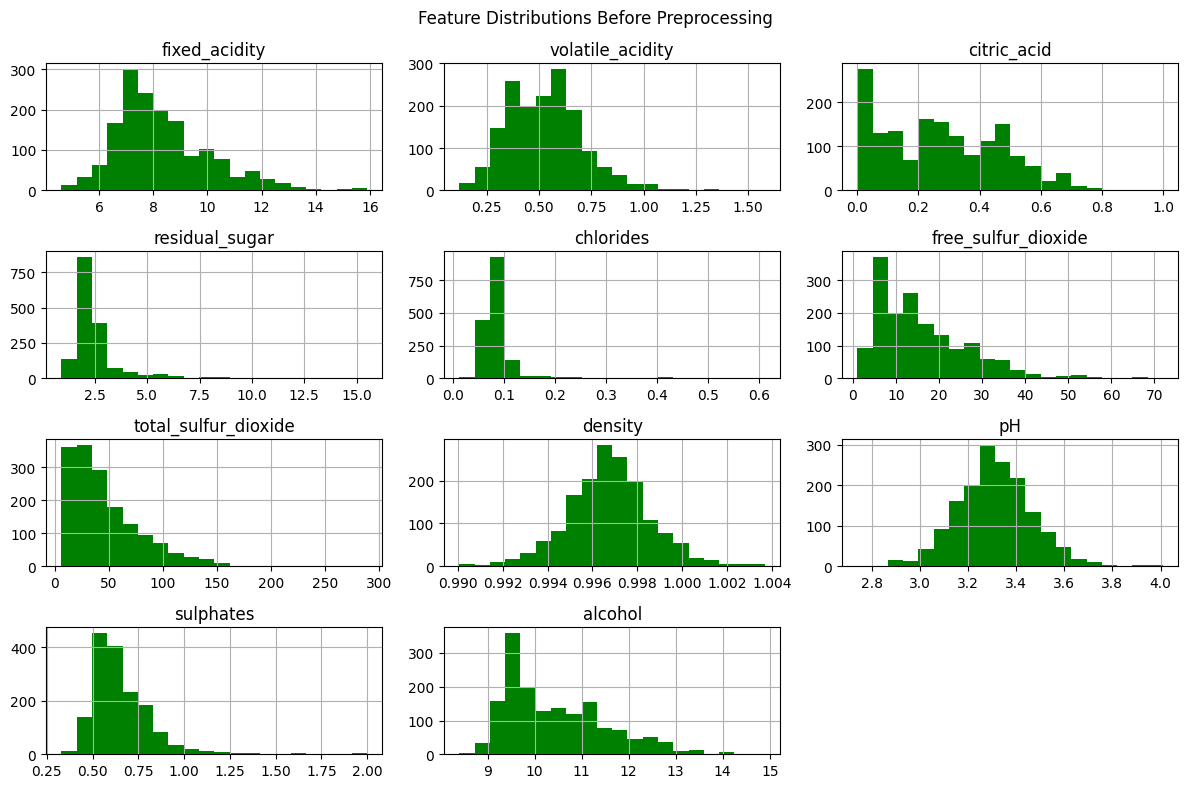

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
import seaborn as sns
X.hist(figsize=(12, 8), bins=20, color = "green")
plt.suptitle('Feature Distributions Before Preprocessing')
plt.tight_layout()
plt.show()

#Checking for distributions of classes

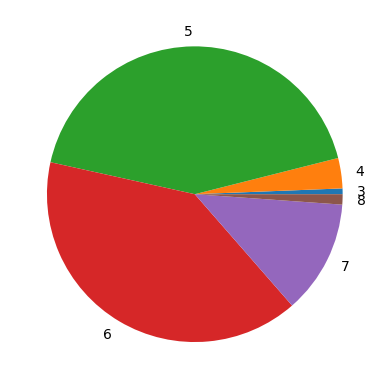

[3 4 5 6 7 8] [ 10  53 681 638 199  18]


In [13]:
uni, counts = np.unique(y, return_counts=True)
plt.pie(counts, labels=uni)
plt.show()
print(uni, counts)

# Issues with the dataset

The dataset does not have missing values and there is no strong correlation between features. However, the dataset has two obvious issues:

1. skewed explanatory variables (features) with outliers
2. imbalanced class

The dataset has extremely imbalanced classes with minority classes 3, 4, 8 having less than 0.05 ratio to majority class. I choose to use Synthetic Minority Oversampling Technique (SMOTE) to oversample the minority class followed by undersampling with Tomek links. The oversampling is to ensure a balanced dataset and the undersampling is to reduce the effects of outliers on the dataset itself. To solve the skewed features, I choose to use scalers to scale them and reduce the effect of outliers. The scaler is applied first and then balancing techniques are applied on the dataset.

Results are shown below

In [14]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler

Standard Scaler


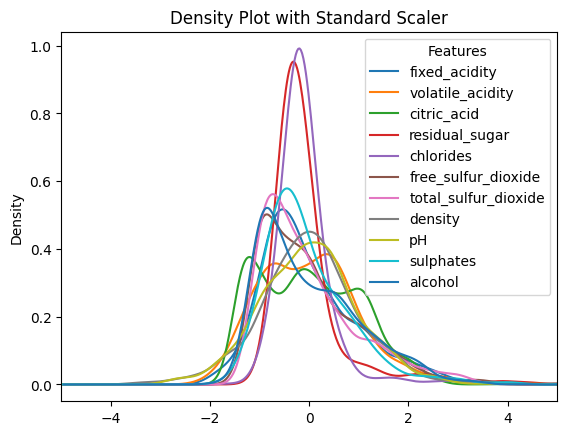

Power Transformer


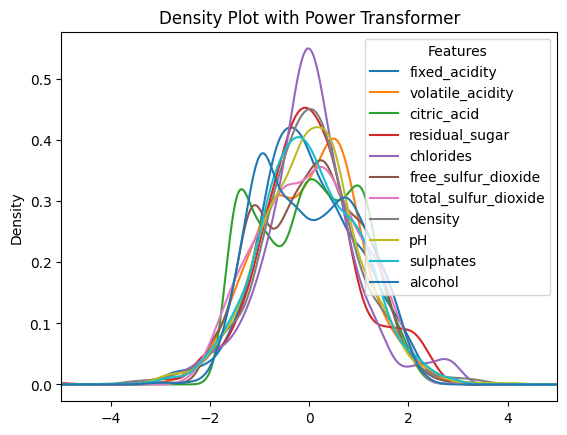

Robust Scaler


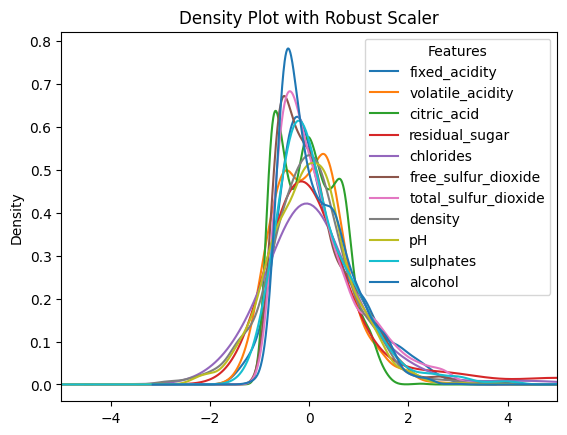

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler

# Assuming 'X' is your DataFrame with multiple features.

# Plotting density plots after applying Standard Scaler
print("Standard Scaler")
scaled_data = StandardScaler().fit_transform(X)
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)
ax = scaled_df.plot(kind='density', xlim=[-5, 5])
plt.legend(title='Features')
plt.title('Density Plot with Standard Scaler')
plt.show()

# Plotting density plots after applying Power Transformer
print("Power Transformer")
transformed_data = PowerTransformer().fit_transform(X)
transformed_df = pd.DataFrame(transformed_data, columns=X.columns)
ax = transformed_df.plot(kind='density', xlim=[-5, 5])
plt.legend(title='Features')
plt.title('Density Plot with Power Transformer')
plt.show()

# Plotting density plots after applying Robust Scaler
print("Robust Scaler")
robust_scaled_data = RobustScaler().fit_transform(X)
robust_scaled_df = pd.DataFrame(robust_scaled_data, columns=X.columns)
ax = robust_scaled_df.plot(kind='density', xlim=[-5, 5])
plt.legend(title='Features')
plt.title('Density Plot with Robust Scaler')
plt.show()


# Scaler results


From plots above, we can see that power transformer performs the best in terms of treating outliers. However, it does not accurately reflect the variance of some catagories. I choose robust scaler to perform the preprocessing.
However, to better illustrate what autosklearn can do for pipeline optimization, I will not use scaling on the dataset for autosklearn training since autosklearn has an internal data preprocessor.

# Solving the imbalanced classes issue

To solve the imbalanced classes, I first oversample the minority class so the ratio between all minority classes to majority class is about 1:3. The reason to choose this ratio is because the minority classes have very limited number of samples. The more data we oversample, the more noises and biases we introduce to the dataset. This can very likely reduce the generalizability of the model in long run. After oversampling, I undersample the data to draw majority and minority class closer while reducing the effect of outliers. This is achieved with SMOTE and Tomek links (SMOTETomek).

In [16]:
from imblearn.combine import SMOTETomek

In [17]:
# X_samp, y_samp = SMOTETomek(random_state=42, sampling_strategy='auto').fit_resample(X, y)
samp_count = {
    3: 200,
    4: 200,
#     5: 200,
#     6: 200,
#     7: 200,
    8: 200
}
X_samp, y_samp = SMOTETomek(random_state=42, sampling_strategy=samp_count).fit_resample(X, y)

In [18]:
list(zip(*np.unique(y, return_counts=True)))

[(3, 10), (4, 53), (5, 681), (6, 638), (7, 199), (8, 18)]

In [19]:
list(zip(*np.unique(y_samp, return_counts=True)))

[(3, 197), (4, 181), (5, 599), (6, 546), (7, 167), (8, 188)]

In [20]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_samp, y_samp, random_state=42)

In [21]:
rb = RobustScaler().fit(X_train)
X_train_transformed = rb.transform(X_train)
X_test_transformed = rb.transform(X_test)

In [22]:
from sklearn.model_selection import cross_val_score

In [25]:
clf = RandomForestClassifier(random_state=42)
clf = clf.fit(X_train, y_train)
print("RF Accuracy nwithout scaler = ", clf.score(X_test, y_test))

clf = clf.fit(X_train_transformed, y_train)
print("RF Accuracy after applying scaler = ", clf.score(X_test_transformed, y_test))

RF Accuracy nwithout scaler =  0.7893617021276595
RF Accuracy after applying scaler =  0.7957446808510639


In [24]:
from autosklearn.classification import AutoSklearnClassifier
from sklearn.model_selection import StratifiedKFold

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the AutoSklearnClassifier with the defined cross-validation strategy
automl = AutoSklearnClassifier(
    time_left_for_this_task=300,
    resampling_strategy='cv',
    resampling_strategy_arguments={"train_size": 0.67,
                                    "shuffle": True,
                                   "folds": 5}
)

automl.fit(X_train, y_train)

y_hat = automl.predict(X_test)
print("AutoML Accuracy", sklearn.metrics.accuracy_score(y_test, y_hat))
#print("AutoML new Accuracy", automl.score(X_test, y_test))

Fitting to the training data: 100%|██████████| 300/300 [04:54<00:00,  1.02it/s, The total time budget for this task is 0:05:00]


AutoML Accuracy 0.8063829787234043
AutoML new Accuracy 0.8063829787234043


In [26]:
print(automl.leaderboard())

          rank  ensemble_weight               type      cost   duration
model_id                                                               
2            1             0.40      random_forest  0.243608  16.845448
10           2             0.22      random_forest  0.245028  14.273620
3            3             0.08      random_forest  0.258523  21.244321
5            4             0.14      random_forest  0.276989  26.826031
9            5             0.10  gradient_boosting  0.323153   8.399434
8            6             0.04      random_forest  0.333807  16.201525
13           7             0.02  gradient_boosting  0.432528   8.037455


# Results and Discussions

Our evaluations reveal that the autosklearn model slightly outperforms the standard RandomForest (RF) model. Extensive testing with the autosklearn package was undertaken to understand the underlying reasons. Primarily, a resampling strategy was integrated, and a 5-fold cross-validation was implemented to enhance model generalizability and reduce the likelihood of overfitting. The performance of the autosklearn ensemble models suggests that tree-based methods are highly effective, which also accounts for the strong baseline performance of the RF model.

In summary, two major challenges were addressed: 1) skewed features with outliers were managed using autosklearn's internal data preprocessing tools, and 2) class imbalance issues were tackled using a combination of over- and undersampling techniques, specifically with SMOTETomek. These measures have collectively enhanced the autosklearn's performance beyond that of the conventional RF model.